In [1]:
import yfinance as yf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

1. Получить данные цен акции какой-нибудь компании (например, AAPL) с помощью подключения к любому доступному API через питон (например, yfinance
yfinance · PyPI , тикер яблочной компании в yfinance - AAPL) и индекса (в yfinance тикер –SPY). Если соединить все данные в один датафрейм, то получим что-то вроде этого (лучше побольше промежуток времени взять, например, полгода)

In [3]:
aapl = yf.Ticker('AAPL')
spy = yf.Ticker('SPY')
aapl_hist = aapl.history(period="6mo")
spy_hist = spy.history(period="6mo")

In [4]:
aapl_hist['ticker'] = 'AAPL'
spy_hist['ticker'] = 'SPY'

In [5]:
aapl_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2023-01-09 00:00:00-05:00,130.091158,133.022623,129.512840,129.772079,70790800,0.0,0.0,AAPL
2023-01-10 00:00:00-05:00,129.881766,130.878863,127.747981,130.350403,63896200,0.0,0.0,AAPL
2023-01-11 00:00:00-05:00,130.868885,133.122317,130.081186,133.102386,69458900,0.0,0.0,AAPL
2023-01-12 00:00:00-05:00,133.491250,133.870136,131.058333,133.022614,71379600,0.0,0.0,AAPL
2023-01-13 00:00:00-05:00,131.646629,134.528237,131.277709,134.368698,57809700,0.0,0.0,AAPL


In [6]:
spy_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,ticker
Date,,,,,,,,,
2023-01-09 00:00:00-05:00,387.446596,390.751675,384.766834,384.955383,73978100,0.0,0.0,0.0,SPY
2023-01-10 00:00:00-05:00,384.349980,387.724512,383.377308,387.655029,65358100,0.0,0.0,0.0,SPY
2023-01-11 00:00:00-05:00,389.292704,392.637462,388.449064,392.558044,68881100,0.0,0.0,0.0,SPY
2023-01-12 00:00:00-05:00,393.699437,395.505785,389.481265,393.987244,90157700,0.0,0.0,0.0,SPY
2023-01-13 00:00:00-05:00,390.672257,396.111229,390.394355,395.515717,63903900,0.0,0.0,0.0,SPY


In [7]:
common = pd.concat([aapl_hist, spy_hist])

# форматирование колонки даты
idx = common.index
new_idx = idx.strftime('%Y-%m-%d')
common.index = new_idx

# указание колонок используемых в графике далее
common.reset_index(inplace=True)
common = common[['Date', 'Open', 'Close', 'ticker']]
common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    248 non-null    object 
 1   Open    248 non-null    float64
 2   Close   248 non-null    float64
 3   ticker  248 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.9+ KB


In [8]:
common[common.ticker == 'AAPL'].head()

,Date,Open,Close,ticker
0,2023-01-09,130.091158,129.772079,AAPL
1,2023-01-10,129.881766,130.350403,AAPL
2,2023-01-11,130.868885,133.102386,AAPL
3,2023-01-12,133.491250,133.022614,AAPL
4,2023-01-13,131.646629,134.368698,AAPL


In [9]:
common[common.ticker == 'SPY'].head()

,Date,Open,Close,ticker
124,2023-01-09,387.446596,384.955383,SPY
125,2023-01-10,384.349980,387.655029,SPY
126,2023-01-11,389.292704,392.558044,SPY
127,2023-01-12,393.699437,393.987244,SPY
128,2023-01-13,390.672257,395.515717,SPY


In [10]:
cols = common.columns.tolist()

In [11]:
cols

['Date', 'Open', 'Close', 'ticker']

Закидываем полученные данные на локальный хост в вашу базу данных также с помощью питона (можно по частям, можно одним конкатенированным датафреймом).
- используется память на виртуальной машине googlecolab вместо localhost

In [12]:
import sqlite3

In [13]:
# создание базы данных и таблицы
con = sqlite3.connect('database.db')
cur = con.cursor()
cur.execute("CREATE TABLE securities(Date, Open, Close, ticker)")

In [14]:
# таблица создана
res = cur.execute("SELECT name FROM sqlite_master")
res.fetchone()

('securities',)

In [15]:
# копирование данных датафрейма в созданную таблицу
common.to_sql('securities', con, if_exists='replace', index=False)

248

In [16]:
# подтверждение изменений
con.commit()

In [17]:
# данные вставлены корректно
res = cur.execute("SELECT * FROM securities")
res.fetchall()

[('2023-01-09', 130.0911575919093, 129.77207946777344, 'AAPL'),
 ('2023-01-10', 129.88176632585493, 130.35040283203125, 'AAPL'),
 ('2023-01-11', 130.8688853540207, 133.10238647460938, 'AAPL'),
 ('2023-01-12', 133.4912499770948, 133.02261352539062, 'AAPL'),
 ('2023-01-13', 131.6466293553823, 134.3686981201172, 'AAPL'),
 ('2023-01-17', 134.43849533070656, 135.54527282714844, 'AAPL'),
 ('2023-01-18', 136.4227237306548, 134.81739807128906, 'AAPL'),
 ('2023-01-19', 133.69068069011047, 134.87722778320312, 'AAPL'),
 ('2023-01-20', 134.8871896957878, 137.46966552734375, 'AAPL'),
 ('2023-01-23', 137.71893300027173, 140.70025634765625, 'AAPL'),
 ('2023-01-24', 139.9025796369428, 142.1161346435547, 'AAPL'),
 ('2023-01-25', 140.48088976316362, 141.4480743408203, 'AAPL'),
 ('2023-01-26', 142.7542775786182, 143.5419921875, 'AAPL'),
 ('2023-01-27', 142.74431030034725, 145.50625610351562, 'AAPL'),
 ('2023-01-30', 144.53909336941618, 142.58477783203125, 'AAPL'),
 ('2023-01-31', 142.2856380012917, 143.8

In [18]:
con.close()

2. Достаем из локального хоста закинутые ранее данные также с помощью питона
- используется память на виртуальной машине googlecolab вместо localhost

In [19]:
# копирование данных из таблицы в новый датафрейм
new_con = sqlite3.connect('database.db')
new_cur = new_con.cursor()
res = new_cur.execute("SELECT * FROM securities")

In [20]:
df = pd.DataFrame(res.fetchall())

In [21]:
new_con.close()

3. Строим посредством графических библиотек питона (matplotlib, например) относительные (внимание – не абсолютные!) ежедневные изменения цен 2 инструментов (AAPL, SPY).

In [22]:
df.columns = ['Date', 'Open', 'Close', 'ticker']

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    248 non-null    datetime64[ns]
 1   Open    248 non-null    float64       
 2   Close   248 non-null    float64       
 3   ticker  248 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 7.9+ KB


In [25]:
df['Relative_change'] = round(((df['Close'] - df['Open']) / df['Open']) * 100, 2)

In [26]:
df.head()

,Date,Open,Close,ticker,Relative_change
0,2023-01-09,130.091158,129.772079,AAPL,-0.25
1,2023-01-10,129.881766,130.350403,AAPL,0.36
2,2023-01-11,130.868885,133.102386,AAPL,1.71
3,2023-01-12,133.491250,133.022614,AAPL,-0.35
4,2023-01-13,131.646629,134.368698,AAPL,2.07


In [27]:
df.tail()

,Date,Open,Close,ticker,Relative_change
243,2023-06-30,441.440002,443.279999,SPY,0.42
244,2023-07-03,442.920013,443.790009,SPY,0.20
245,2023-07-05,441.910004,443.130005,SPY,0.28
246,2023-07-06,439.420013,439.660004,SPY,0.05
247,2023-07-07,438.630005,438.549988,SPY,-0.02


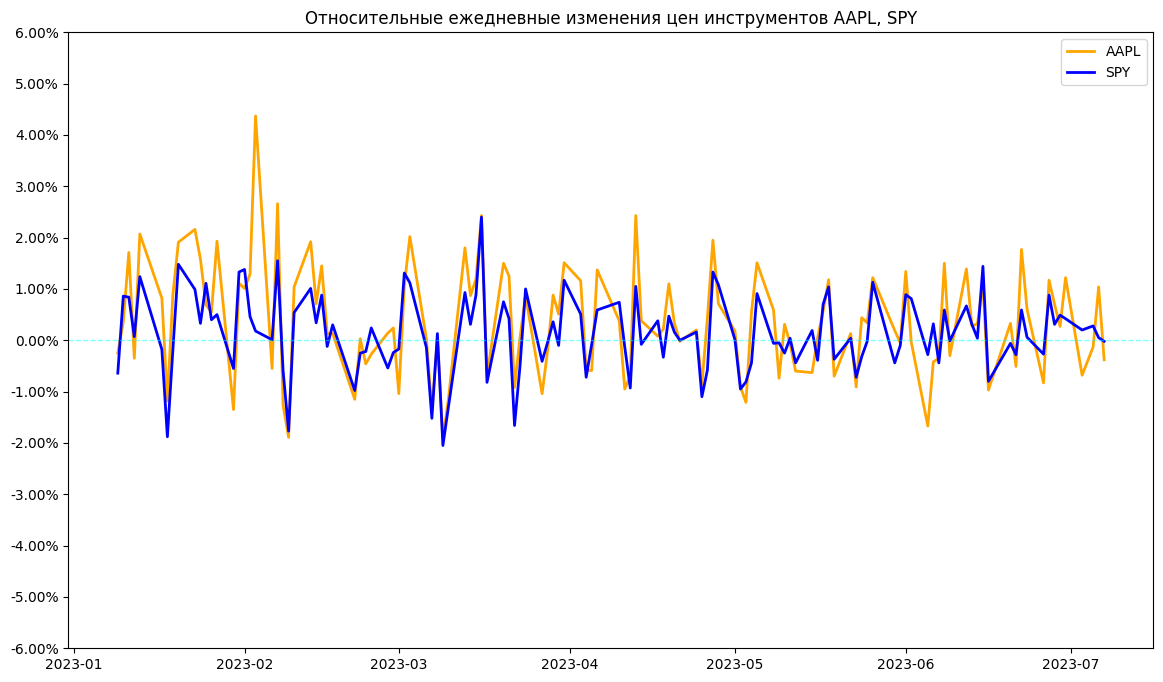

In [35]:
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(df[df['ticker'] == 'AAPL']['Date'], df[df['ticker'] == 'AAPL']['Relative_change'],
        label='AAPL',
        linewidth=2,
        c='orange')
ax.plot(df[df['ticker'] == 'SPY']['Date'], df[df['ticker'] == 'SPY']['Relative_change'],
        label='SPY',
        linewidth=2,
        c='b')
ax.axhline(y=0, color='cyan', linewidth=1, linestyle='--', alpha=.5)
yrange = [i for i in range(-6, 7)]
ax.set_yticks(yrange)

ax.set_yticklabels([str(i)+'.00%' for i in yrange])
# ax.grid(visible=False)
ax.set_title('Относительные ежедневные изменения цен инструментов AAPL, SPY')
ax.legend();